### clip-ViT-B-16

This is the Image & Text model CLIP, which maps text and images to a shared vector space.

In [1]:
#!pip install sentence-transformers

In [5]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import numpy as np
import glob

#Load CLIP model
model = SentenceTransformer('clip-ViT-B-16')

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/118 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/354 [00:00<?, ?B/s]

0_CLIPModel/tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

/Users/dsezer/NeueFische/temp/tests/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
# change path to display images from your local dir
images = [Image.open(path) for path in glob.glob("./photos/*.jpg")]

#Encode the images:
img_emb = model.encode(images)

print(img_emb.shape)
num_imgs = len(images)

(8, 512)


In [22]:
#Encode text descriptions
texts = ['Two dogs in the snow', 'A cat on a table', 'A picture of London at night','a cat is laying on the steps of a building']

text_emb = model.encode(texts)

text_emb.shape

(4, 512)

tensor([[0.2371, 0.1815, 0.1385, 0.2067],
        [0.1336, 0.1779, 0.1928, 0.1821],
        [0.2965, 0.2530, 0.1413, 0.2417],
        [0.1789, 0.2508, 0.1001, 0.1512],
        [0.2027, 0.2239, 0.1444, 0.2327],
        [0.1124, 0.1441, 0.2569, 0.1570],
        [0.1137, 0.2436, 0.1340, 0.3105],
        [0.3074, 0.1151, 0.1133, 0.0878]])


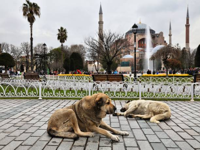

Two dogs in the snow


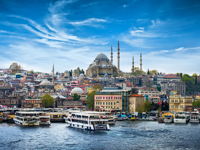

A picture of London at night


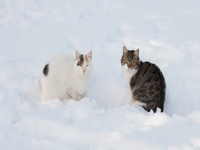

Two dogs in the snow


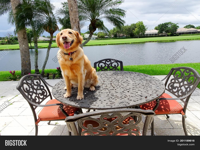

A cat on a table


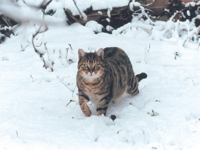

a cat is laying on the steps of a building


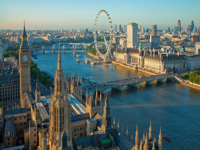

A picture of London at night


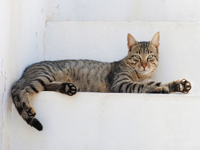

a cat is laying on the steps of a building


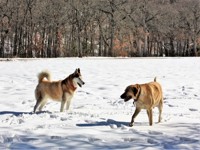

Two dogs in the snow


In [23]:
cos_scores = util.cos_sim(img_emb, text_emb)

print(cos_scores)

idx = np.argmax(cos_scores,axis=1)

for i,im in enumerate(img_emb):    
    display(images[i].resize((200, 150)))
    print(texts[idx[i]])


### Custom captions with BLIP

BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation

Salesforce/blip-image-captioning-base (Image captioning pretrained on COCO dataset)


In [17]:
#import requests
from transformers import AutoProcessor, BlipForConditionalGeneration
import torch

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
display(device)

'cpu'

In [19]:
# load the processor and the captioning model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base",torch_dtype=torch.float16).to(device)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/Users/dsezer/NeueFische/temp/tests/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [20]:
# captioning utility
def caption_images(input_image):

    inputs = blip_processor(images=input_image, return_tensors="pt").to(device, torch.float16)
    pixel_values = inputs.pixel_values

    generated_ids = blip_model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_caption

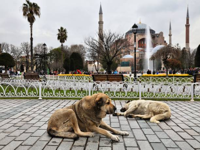

two dogs laying on the ground in front of a mosque


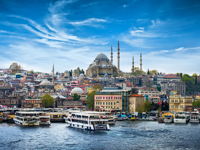

istanbul, turkey, turkey, turkey, turkey, turkey travel, turkey, turkey, turkey, turkey, turkey, turkey, turkey, turkey


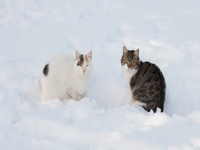

two cats playing in the snow


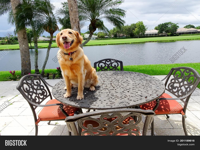

a golden retrieve dog sitting on a patio table


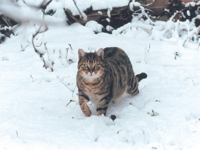

a cat walking in the snow in the woods


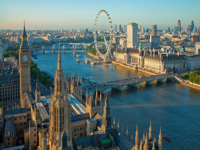

the london skyline with the river thames and big ben


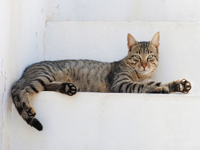

a cat is laying on the steps of a building


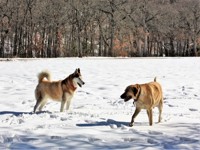

two dogs playing in the snow


In [21]:
captions = []
for img in images:    
    display(img.resize((200, 150)))
    label = caption_images(img)
    captions.append(label)
    print(label)